In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rc
plt.style.use('classic')
rc('font', family='serif')
rc('figure', facecolor='w')
from mpl_toolkits.mplot3d import Axes3D
from astropy.io import fits, ascii
from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord
from collections import OrderedDict
from scipy.interpolate import UnivariateSpline
import os, math
from natsort import natsorted as nsort

import TheCannon
from TheCannon import apogee, dataset, model
import apogee_tools as ap
AP_PATH = os.environ['APOGEE_DATA']

line_list = ap.lines
line_names = line_list.keys()

/home/jess/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [36]:
mann_xm1 = pd.read_csv('/home/jess/Desktop/Research/Mdwarf_project/cannon_runs/raw_data_files/mann_89_APOGEE_x_Gaia.csv')
mann_teff = np.array(mann_xm1['TEFF'])
mann_fe_h = np.array(mann_xm1['FE_H'])
mann_bp_rp = mann_xm1['phot_bp_mean_mag'] - mann_xm1['phot_rp_mean_mag']
mann_g_abs = mann_xm1['phot_g_mean_mag'] + 5*np.log10(mann_xm1['parallax'])-10
mann_dist = 1/np.array(mann_xm1['parallax'])
mann_ra = np.array(mann_xm1['RA_1'])
mann_dec = np.array(mann_xm1['DEC_1'])

mann_results = pd.read_csv('/home/jess/Desktop/Research/Mdwarf_project/cannon_runs/train_mann/results/test_results.csv')

In [196]:
test = pd.read_csv('test_results/test_mann_x_APASS_x_SDSS.csv')
test['K_ABS'] = test['K'] + 5*np.log10(test['PLX'])-10

In [197]:
# test = test[test['CHI'] < 80000]
test = test[(test['FE_H'] > -.5) & (test['FE_H'] < .5)]

In [122]:
test.keys()

Index(['col1', 'BP_RP', 'CHI', 'DEC', 'DIST', 'FE_H', 'G_ABS', 'H', 'ID', 'J',
       'K', 'PLX', 'PLX_ERR', 'RA', 'TEFF', 'X', 'Y', 'Z', 'RAJ2000',
       'DEJ2000', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'field', 'nobs',
       'mobs', 'B-V', 'e_B-V', 'Vmag', 'e_Vmag', 'u_e_Vmag', 'Bmag', 'e_Bmag',
       'u_e_Bmag', 'gpmag', 'e_gpmag', 'u_e_gpmag', 'rpmag', 'e_rpmag',
       'u_e_rpmag', 'ipmag', 'e_ipmag', 'u_e_ipmag', 'angDist', 'RAdeg',
       'DEdeg', 'errHalfMaj_x', 'errHalfMin_x', 'errPosAng_x', 'objID', 'mode',
       'q_mode', 'class', 'SDSS12', 'm_SDSS12', 'flags', 'ObsDate', 'Q',
       'umag', 'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag',
       'zmag', 'e_zmag', 'zsp', 'e_zsp', 'f_zsp', 'zph', 'e_zph', 'avg_zph',
       'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'SpObjID', 'spType', 'spCl',
       'subClass', 'angDist_x'],
      dtype='object')

5657


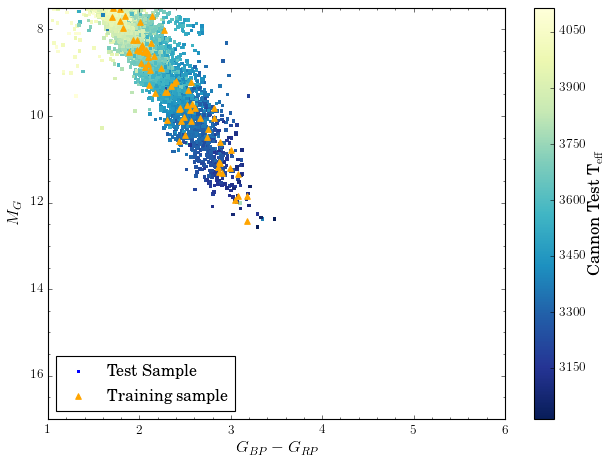

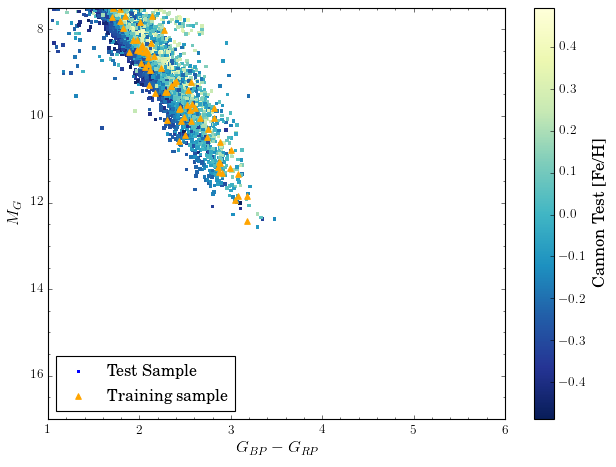

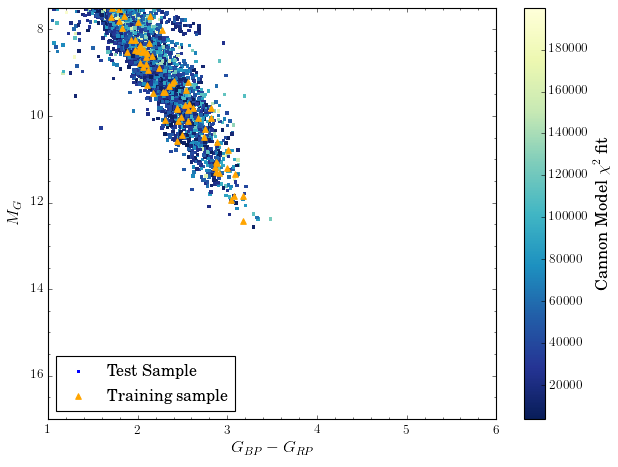

In [198]:
print(len(test['BP_RP']))

pl = plt.scatter(test['BP_RP'], test['G_ABS'], c=test['TEFF'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test Sample')
plt.scatter(mann_bp_rp, mann_g_abs, color='orange', marker='^', label='Training sample', s=25)
cb = plt.colorbar(pl)
cb.set_label(r'Cannon Test T$_{\rm eff}$', fontsize=15)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(17,7.5)
plt.xlim(1,6)
plt.legend(loc='lower left', scatterpoints=1)
plt.minorticks_on()
plt.tight_layout()
plt.show()

#=============

pl = plt.scatter(test['BP_RP'], test['G_ABS'], c=test['FE_H'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test Sample')
plt.scatter(mann_bp_rp, mann_g_abs, color='orange', marker='^', label='Training sample', s=25)
cb = plt.colorbar(pl)
cb.set_label(r'Cannon Test [Fe/H]', fontsize=15)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(17,7.5)
plt.xlim(1,6)
plt.legend(loc='lower left', scatterpoints=1)
plt.minorticks_on()
plt.tight_layout()
plt.show()

#=============

# fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[16,4])
pl = plt.scatter(test['BP_RP'], test['G_ABS'], c=test['CHI'], cmap='YlGnBu_r', edgecolor='none', s=10, marker='s', \
                 label='Test Sample')
plt.scatter(mann_bp_rp, mann_g_abs, color='orange', marker='^', label='Training sample', s=25)
cb = plt.colorbar(pl)
cb.set_label(r'Cannon Model $\chi^2$ fit', fontsize=15)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=15)
plt.ylabel(r'$M_{G}$', fontsize=15)
plt.ylim(17,7.5)
plt.xlim(1,6)
plt.legend(loc='lower left', scatterpoints=1)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [216]:
v_j = np.array(test['Vmag'] - test['J'])
r_z = np.array(test['rmag'] - test['zmag'])
r_j = np.array(test['rmag'] - test['J'])
v_k = np.array(test['Vmag'] - test['K'])

# Mann relations
bp_rp_teff = 3500*(3.245 - 2.4309*test['BP_RP'] + 1.043*(test['BP_RP'])**2 - .2127*(test['BP_RP'])**3 + .01649*(test['BP_RP'])**4)
bp_rp_teff2 = 3500*(2.835 - 1.893*test['BP_RP'] + .7860*(test['BP_RP'])**2 - .1594*(test['BP_RP'])**3 + .01243*(test['BP_RP'])**4 + .04417*test['FE_H'])
vj_teff = 3500*(2.840 - 1.3453*v_j + .3906*(v_j)**2 - .0546*(v_j)**3 + .002913*(v_j)**4)
vj_teff2 = 3500*(2.515 - 1.054*v_j + 0.2965*(v_j)**2 - 0.04150*(v_j)**3 + 0.002245*(v_j)**4 + 0.05262*test['FE_H'])
rz_teff = 3500*(1.547 - 0.7053*r_z + 0.3656*(r_z)**2 - 0.1008*(r_z)**3 + 0.01046*(r_z)**4)
rz_teff2 = 3500*(1.572 - 0.7220*r_z + 0.3560*(r_z)**2 - 0.09221*(r_z)**3 + 0.009071*(r_z)**4 + 0.05220*test['FE_H'])
rj_teff = 3500*(2.445 - 1.2578*r_j + 0.4340*(r_j)**2 - 0.0720*(r_j)**3 + 0.004502*(r_j)**4)
rj_teff2 = 3500*(2.532 - 1.319*r_j + 0.4449*(r_j)**2 - 0.07151*(r_j)**3 + 0.004333*(r_j)**4 + 0.05629*test['FE_H'])

bp_rp_diff = test['TEFF'] - bp_rp_teff
bp_rp_diff2 = test['TEFF'] - bp_rp_teff2
vj_diff = test['TEFF'] - vj_teff
vj_diff2 = test['TEFF'] - vj_teff2
rz_diff = test['TEFF'] - rz_teff
rz_diff2 = test['TEFF'] - rz_teff2
rj_diff = test['TEFF'] - rj_teff
rj_diff2 = test['TEFF'] - rj_teff2

# Casagrande relation
vk_teff = 5040/(-0.4809 + 0.8009*v_k - 0.1039*(v_k)**2 + 0.0056*(v_k)**3)

vk_diff = test['TEFF'] - vk_teff

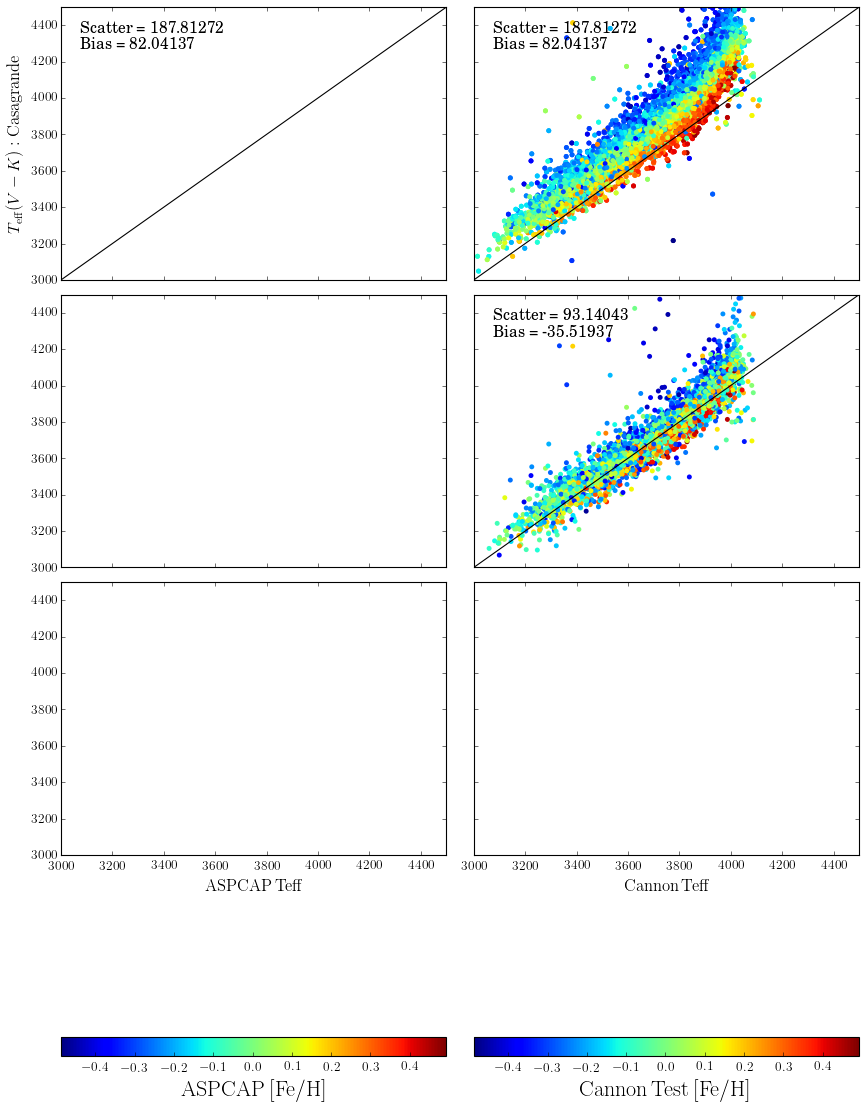

In [237]:
text2 = 'Scatter = %s \n Bias = %s'%(round(np.std(vk_diff),5), round(np.mean(vk_diff),5))
text4 = 'Scatter = %s \n Bias = %s'%(round(np.std(vj_diff2),5), round(np.mean(vj_diff2),5))

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=[11,16], sharex=True, sharey=True)

ax1.plot(x,x, color='k')
ax1.text(0.05, 0.95, text1, fontsize=14, transform=ax1.transAxes, verticalalignment='top')
im1 = ax2.scatter(test['TEFF'], bp_rp_teff, edgecolor='none', c=test['FE_H'])
ax1.set_xlim(3000,4500)
ax1.set_ylim(3000,4500)
ax1.set_ylabel(r'$T_{\rm eff}(V-K): {\rm Casagrande}$', fontsize=15)

ax2.plot(x,x, color='k')
ax2.text(0.05, 0.95, text1, fontsize=14, transform=ax2.transAxes, verticalalignment='top')
im2 = ax2.scatter(test['TEFF'], bp_rp_teff, edgecolor='none', c=test['FE_H'])

ax4.plot(x,x, color='k')
ax4.text(0.05, 0.95, text4, fontsize=14, transform=ax4.transAxes, verticalalignment='top')
ax4.scatter(test['TEFF'], vj_teff2, edgecolor='none', c=test['FE_H'])

ax5.set_xlabel(r'$\rm ASPCAP \, Teff$', fontsize=15)
ax6.set_xlabel(r'$\rm Cannon \, Teff$', fontsize=15)

plt.tight_layout()
cb1 = fig.colorbar(im1, ax=(ax1, ax3, ax5), orientation='horizontal')
cb1.set_label(r'${\rm ASPCAP \, [Fe/H]}$', fontsize=20)

cb2 = fig.colorbar(im2, ax=(ax2, ax4, ax6), orientation='horizontal')
cb2.set_label(r'${\rm Cannon \, Test \, [Fe/H]}$', fontsize=20)
plt.show()

5657


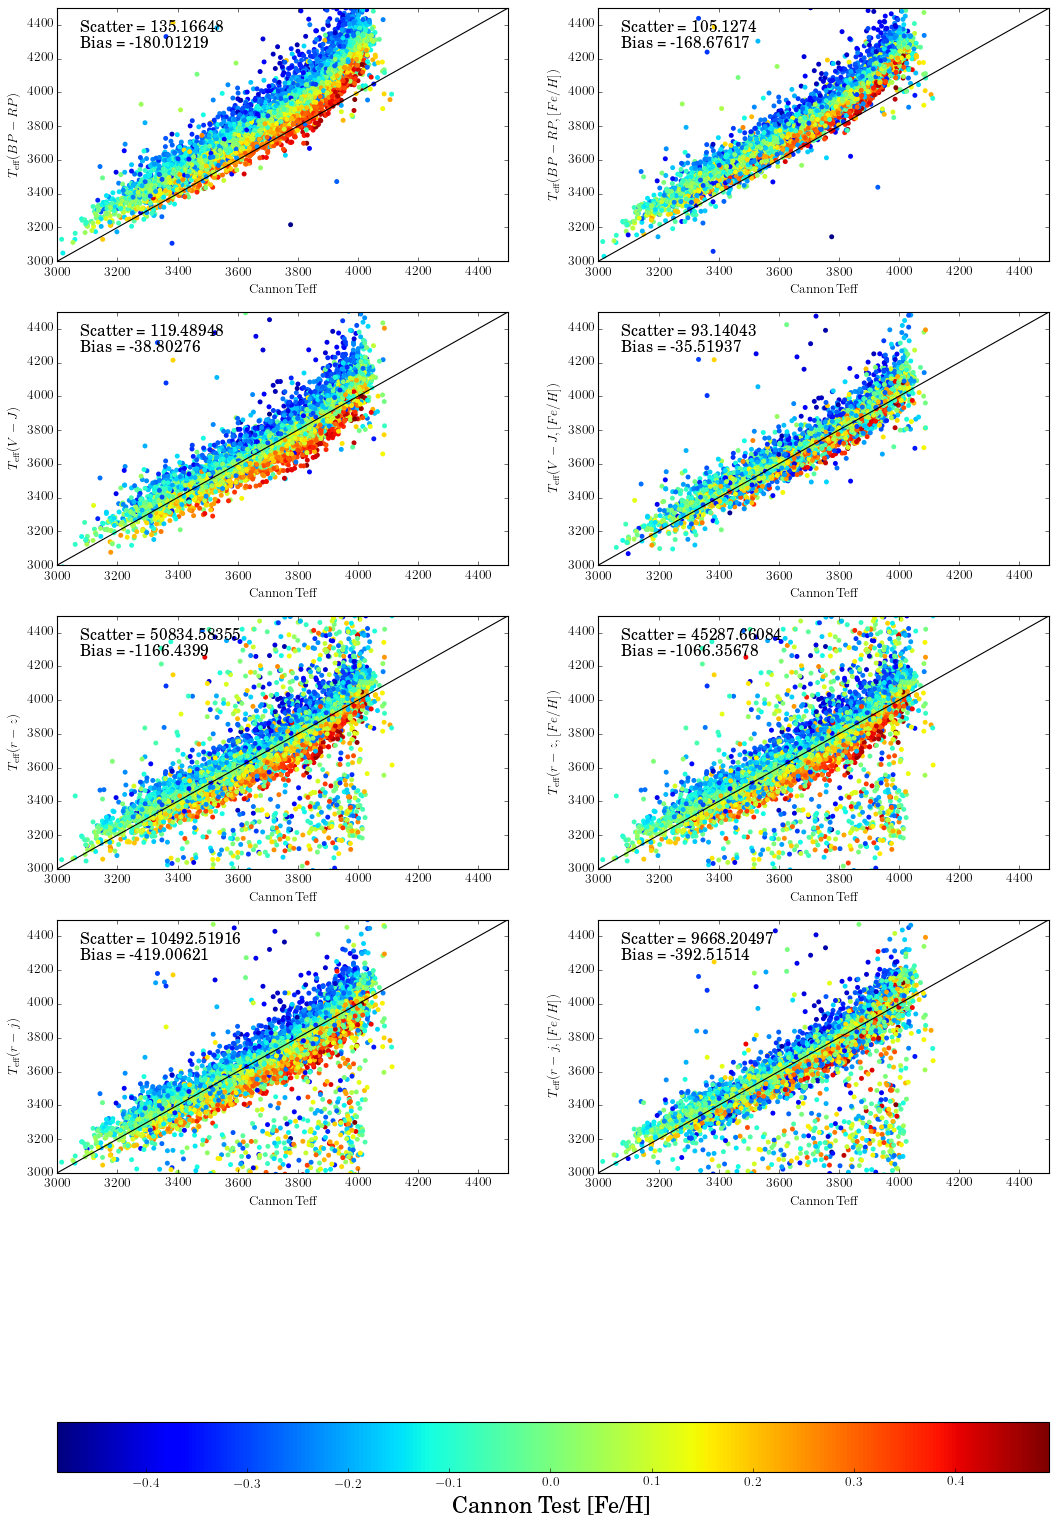

In [200]:
print(len(test))
x = np.linspace(2000,5000)
text1 = 'Scatter = %s \n Bias = %s'%(round(np.std(bp_rp_diff),5), round(np.mean(bp_rp_diff),5))
text2 = 'Scatter = %s \n Bias = %s'%(round(np.std(bp_rp_diff2),5), round(np.mean(bp_rp_diff2),5))
text3 = 'Scatter = %s \n Bias = %s'%(round(np.std(vj_diff),5), round(np.mean(vj_diff),5))
text4 = 'Scatter = %s \n Bias = %s'%(round(np.std(vj_diff2),5), round(np.mean(vj_diff2),5))
text5 = 'Scatter = %s \n Bias = %s'%(round(np.std(rz_diff),5), round(np.mean(rz_diff),5))
text6 = 'Scatter = %s \n Bias = %s'%(round(np.std(rz_diff2),5), round(np.mean(rz_diff2),5))
text7 = 'Scatter = %s \n Bias = %s'%(round(np.std(rj_diff),5), round(np.mean(rj_diff),5))
text8 = 'Scatter = %s \n Bias = %s'%(round(np.std(rj_diff2),5), round(np.mean(rj_diff2),5))

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=[16,26])

ax1.plot(x,x, color='k')
ax1.text(0.05, 0.95, text1, fontsize=14, transform=ax1.transAxes, verticalalignment='top')
im = ax1.scatter(test['TEFF'], bp_rp_teff, edgecolor='none', c=test['FE_H'])
ax1.set_xlim(3000,4500)
ax1.set_ylim(3000,4500)
ax1.set_ylabel(r'$T_{\rm eff}(BP-RP)$')
ax1.set_xlabel(r'$\rm Cannon \, Teff$')

ax2.plot(x,x, color='k')
ax2.text(0.05, 0.95, text2, fontsize=14, transform=ax2.transAxes, verticalalignment='top')
ax2.scatter(test['TEFF'], bp_rp_teff2, edgecolor='none', c=test['FE_H'])
ax2.set_xlim(3000,4500)
ax2.set_ylim(3000,4500)
ax2.set_ylabel(r'$T_{\rm eff}(BP-RP, [Fe/H])$')
ax2.set_xlabel(r'$\rm Cannon \, Teff$')

ax3.plot(x,x, color='k')
ax3.text(0.05, 0.95, text3, fontsize=14, transform=ax3.transAxes, verticalalignment='top')
ax3.scatter(test['TEFF'], vj_teff, edgecolor='none', c=test['FE_H'])
ax3.set_xlim(3000,4500)
ax3.set_ylim(3000,4500)
ax3.set_ylabel(r'$T_{\rm eff}(V-J)$')
ax3.set_xlabel(r'$\rm Cannon \, Teff$')

ax4.plot(x,x, color='k')
ax4.text(0.05, 0.95, text4, fontsize=14, transform=ax4.transAxes, verticalalignment='top')
ax4.scatter(test['TEFF'], vj_teff2, edgecolor='none', c=test['FE_H'])
ax4.set_xlim(3000,4500)
ax4.set_ylim(3000,4500)
ax4.set_ylabel(r'$T_{\rm eff}(V-J, [Fe/H])$')
ax4.set_xlabel(r'$\rm Cannon \, Teff$')

ax5.plot(x,x, color='k')
ax5.text(0.05, 0.95, text5, fontsize=14, transform=ax5.transAxes, verticalalignment='top')
ax5.scatter(test['TEFF'], rz_teff, edgecolor='none', c=test['FE_H'])
ax5.set_xlim(3000,4500)
ax5.set_ylim(3000,4500)
ax5.set_ylabel(r'$T_{\rm eff}(r-z)$')
ax5.set_xlabel(r'$\rm Cannon \, Teff$')

ax6.plot(x,x, color='k')
ax6.text(0.05, 0.95, text6, fontsize=14, transform=ax6.transAxes, verticalalignment='top')
ax6.scatter(test['TEFF'], rz_teff, edgecolor='none', c=test['FE_H'])
ax6.set_xlim(3000,4500)
ax6.set_ylim(3000,4500)
ax6.set_ylabel(r'$T_{\rm eff}(r-z, [Fe/H])$')
ax6.set_xlabel(r'$\rm Cannon \, Teff$')

ax7.plot(x,x, color='k')
ax7.text(0.05, 0.95, text7, fontsize=14, transform=ax7.transAxes, verticalalignment='top')
ax7.scatter(test['TEFF'], rj_teff, edgecolor='none', c=test['FE_H'])
ax7.set_xlim(3000,4500)
ax7.set_ylim(3000,4500)
ax7.set_ylabel(r'$T_{\rm eff}(r-j)$')
ax7.set_xlabel(r'$\rm Cannon \, Teff$')

ax8.plot(x,x, color='k')
ax8.text(0.05, 0.95, text8, fontsize=14, transform=ax8.transAxes, verticalalignment='top')
ax8.scatter(test['TEFF'], rj_teff2, edgecolor='none', c=test['FE_H'])
ax8.set_xlim(3000,4500)
ax8.set_ylim(3000,4500)
ax8.set_ylabel(r'$T_{\rm eff}(r-j, [Fe/H])$')
ax8.set_xlabel(r'$\rm Cannon \, Teff$')

cb = fig.colorbar(im, ax=((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)), orientation='horizontal')
cb.set_label(r'Cannon Test [Fe/H]', fontsize=20)
plt.show()